# PixelFilterBaseClass

A generic class for filtering an image a the pixel level. Create subclasses of this in order to create custom filters.


## Import dependencies

In [1]:
# This is a trick to import from parent directories in Jupyter Notebooks
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
import margo_loader
from utils.ImageFiles import read_img
from utils.Formatting import flattish

In [3]:
from abc import ABC, abstractmethod
import numpy as np

## Define the class

In [4]:
class PixelFilterBaseClass(ABC):
    
    @abstractmethod
    def filter_pixel(self, rgb):
        raise Exception("Not implemented")
        
    def filter_image(self, img):
        
        """ 
        Filter an image by removing pixels where filter_pixel(p) returns False
        """
        
        pixels = flattish(img)
        
        pixels = [self.filter_pixel(x) for x in pixels]
        return np.uint8(np.array(pixels).reshape(img.shape[0], img.shape[1], 4))


## Demo

The DoNothingFilter returns rgb pixels without modification.

The DropRedsFilter deletes an pixels with red values > 0.

In [5]:
# :: ignore-cell ::
class DoNothingFilter(PixelFilterBaseClass):
    
    def filter_pixel(self, rgb):
        return rgb


In [6]:
# :: ignore-cell ::
class DropRedsFilter(PixelFilterBaseClass):
    
    def filter_pixel(self, rgb):
        r, g, b, a = rgb
        if r > 130:
            a = 0
        return (r,g,b,a)

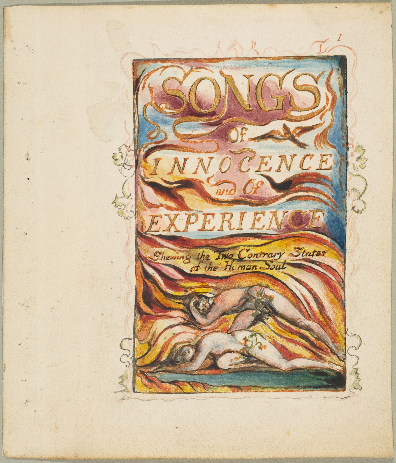

In [7]:
# :: ignore-cell ::

import cv2
from PIL import Image
dnf = DoNothingFilter()
image = read_img("../images/sample.jpg", scale=0.125)
Image.fromarray(dnf.filter_image(image))

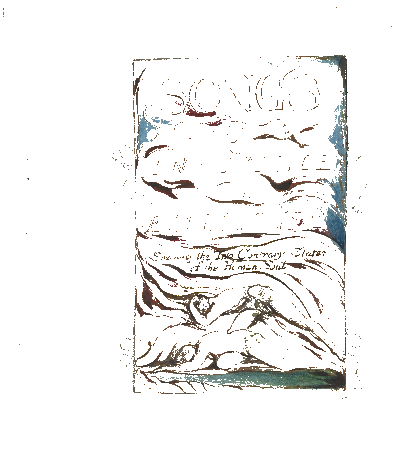

In [8]:
# :: ignore-cell ::
drf = DropRedsFilter()
Image.fromarray(drf.filter_image(image))

# Performance benchmarking

In [9]:
# :: ignore-cell ::
# Time the performance when the image is scaled @ 50 percent

%timeit -n 5 -r 1 dnf.filter_image(image)

102 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 5 loops each)
